In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from datetime import datetime, timedelta

In [3]:
# Load cleaned data.
df = pd.read_pickle('data/cleaned_data')
# print(df.head())

In [4]:
# Sort data by date time, and format data to date time.
# df = df.sort_values(by='transactionDateTime')
df["transactionDateTime"] =  pd.to_datetime(df["transactionDateTime"], format='%Y-%m-%d %H:%M:%S.%f')
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [17]:
# Flag multi-swipe transactions by sorting the transaction time, grouping by customer id and transaction amount.
# Same transaction amount by the same customer id within three minutes are flagged as True in multiSwipe column.
df['multiSwipe'] = (df.sort_values(['transactionDateTime'])
                       .groupby(['customerId', 'transactionAmount'], sort=False)['transactionDateTime']
                       .diff()
                       .dt.total_seconds()
                       .lt(180))
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,multiSwipe
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,...,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,False
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,False
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,False
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,False
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,False


False    777481
True       8882
Name: multiSwipe, dtype: int64


Text(0, 0.5, 'Number of Transactions')

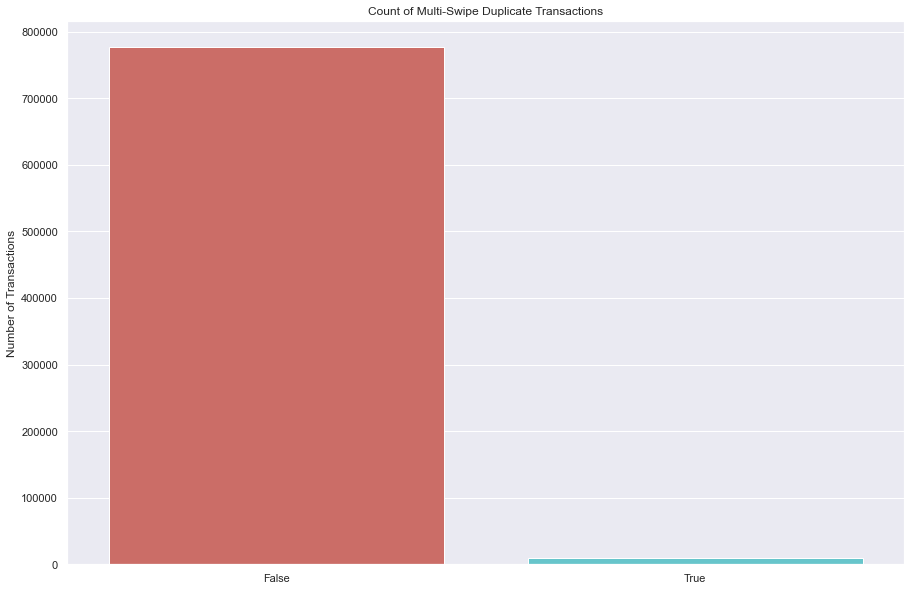

In [6]:
# Set color palette and style of graph
color_pal = sns.color_palette("hls", 8)
sns.set(style="darkgrid")
# Count the number of multiswipe duplicate transactions. 
mult_cnt = df['multiSwipe'].value_counts()
print(mult_cnt)
# Plot the results.
plt.figure(figsize=(15, 10))
sns.barplot(x=[0,1], y=mult_cnt, palette="hls")
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.title('Count of Multi-Swipe Duplicate Transactions')
plt.ylabel('Number of Transactions')

In [7]:
rslt_df = df[df['multiSwipe'] == True]
rslt_df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,multiSwipe
133,984504651,984504651,50000,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,05,...,2015-07-27,640,640,8332,REVERSAL,3632.59,False,False,False,True
263,984504651,984504651,50000,26680.99,2016-03-12 06:34:29,118.52,AMC #706324,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,23319.01,True,False,False,True
281,984504651,984504651,50000,24316.12,2016-03-18 13:57:04,26.71,Planet Fitness #692929,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,25683.88,True,False,False,True
339,984504651,984504651,50000,16503.49,2016-04-08 22:21:11,43.21,WSC #994275,US,US,02,...,2016-03-26,640,640,8332,PURCHASE,33496.51,False,False,False,True
461,984504651,984504651,50000,13054.71,2016-06-04 12:14:55,270.10,EZ Putt Putt #40513,US,US,05,...,2016-05-05,640,640,8332,PURCHASE,36945.29,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785915,428856030,428856030,250,104.44,2016-10-30 20:59:18,314.07,Rodeway Inn #438868,US,US,02,...,2009-08-17,990,990,7660,PURCHASE,145.56,True,False,False,True
785983,205026043,205026043,5000,451.59,2016-06-07 22:29:11,391.94,Uber,US,US,09,...,2008-04-15,198,198,3931,PURCHASE,4548.41,False,False,False,True
785984,205026043,205026043,5000,433.52,2016-06-07 22:30:57,391.94,Uber,US,US,09,...,2008-04-15,198,198,3931,PURCHASE,4566.48,False,False,False,True
786014,205026043,205026043,5000,1571.26,2016-09-18 06:08:02,56.26,Lyft,US,US,05,...,2008-04-15,359,359,258,REVERSAL,3428.74,False,False,False,True


In [21]:
# Sum of multi swipe transactions
mult_true = df.loc[df['multiSwipe'] == True, 'transactionAmount'].sum()
mult_false = df.loc[df['multiSwipe'] == False, 'transactionAmount'].sum()
trans_sum = df['transactionAmount'].sum()
print('Sum of all Transactions: ', trans_sum)
print('Sum of Multi Swipe Transactions: ', mult_true, ', Sum of Non-MultiSwipe Transactions: ', mult_false)

Sum of all Transactions:  107720557.52999996
Sum of Multi Swipe Transactions:  1933949.1099999999 , Sum of Non-MultiSwipe Transactions:  105786608.42000002


In [12]:
# Spot checking multi-swipe transactions.
x = df[['customerId','transactionAmount', 'transactionDateTime', 'multiSwipe']]
x[x['transactionAmount']==450.74]

,customerId,transactionAmount,transactionDateTime,multiSwipe
132,984504651,450.74,2016-01-16 09:52:30,False
133,984504651,450.74,2016-01-16 09:53:15,True
552574,388462699,450.74,2016-05-25 21:39:47,False
702654,363729777,450.74,2016-11-18 01:16:12,False
775782,685866922,450.74,2016-07-03 11:46:46,False


In [13]:
# Spot checking multi-swipe transactions, this transaction has two duplicates.
x[x['transactionAmount']==391.94]

,customerId,transactionAmount,transactionDateTime,multiSwipe
673169,726728113,391.94,2016-05-06 00:44:49,False
785982,205026043,391.94,2016-06-07 22:27:35,False
785983,205026043,391.94,2016-06-07 22:29:11,True
785984,205026043,391.94,2016-06-07 22:30:57,True


In [22]:
# Sum of reverse transaction amounts
reversal = df.loc[df['transactionType'] == 'REVERSAL', 'transactionAmount'].sum()
purchase = df.loc[df['transactionType'] == 'PURCHASE', 'transactionAmount'].sum()
trans_sum = df['transactionAmount'].sum()
print('Sum of all Transactions: ', trans_sum)
print('Sum of Reversal Transactions: ', reversal, ', Sum of Purchase Transactions: ', purchase)

Sum of all Transactions:  107720557.52999996
Sum of Reversal Transactions:  2821792.5 , Sum of Purchase Transactions:  104790305.25


PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64


Text(0, 0.5, 'Number of Transactions')

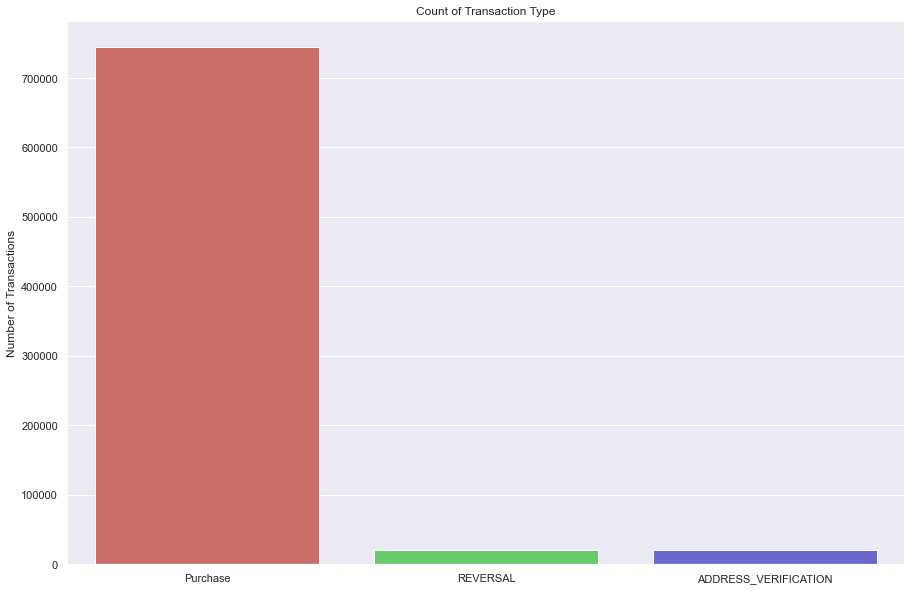

In [25]:
# Set color palette and style of graph
color_pal = sns.color_palette("hls", 8)
sns.set(style="darkgrid")
# Count the number of reversal transactions. 
rev_cnt = df['transactionType'].value_counts()
print(rev_cnt)
# Plot the results.
plt.figure(figsize=(15, 10))
sns.barplot(x=[0,1,2], y=rev_cnt, palette="hls")
plt.xticks(ticks=[0,1,2], labels=['Purchase','REVERSAL','ADDRESS_VERIFICATION'])
plt.title('Count of Transaction Type')
plt.ylabel('Number of Transactions')

In [26]:
df[df['transactionType']=='ADDRESS_VERIFICATION']

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,multiSwipe
17,574788567,574788567,2500,2428.67,2016-01-26 14:04:22,0.0,Convenient Auto Services,US,US,09,...,2015-10-13,206,206,8522,ADDRESS_VERIFICATION,71.33,False,False,False,False
60,574788567,574788567,2500,2500.00,2016-09-02 07:57:44,0.0,Washington Tire,US,US,09,...,2015-10-13,579,579,4219,ADDRESS_VERIFICATION,0.00,False,False,False,False
78,574788567,574788567,2500,2208.54,2016-10-29 11:01:00,0.0,Fast Tire,US,US,09,...,2015-10-13,579,579,4219,ADDRESS_VERIFICATION,291.46,False,False,False,False
102,924729945,924729945,50000,50000.00,2016-10-23 14:00:41,0.0,apple.com,US,US,09,...,2014-07-25,205,205,9459,ADDRESS_VERIFICATION,0.00,False,False,False,False
116,984504651,984504651,50000,48562.35,2016-01-08 19:40:01,0.0,Walgreens #417535,US,US,05,...,2015-07-27,640,640,8332,ADDRESS_VERIFICATION,1437.65,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786035,205026043,205026043,5000,3751.09,2016-11-27 18:09:39,0.0,Krispy Kreme #375200,US,US,80,...,2008-04-15,359,359,258,ADDRESS_VERIFICATION,1248.91,False,False,False,False
786091,899818521,899818521,2500,438.12,2016-04-25 03:35:20,0.0,AMC #145832,US,US,05,...,2013-06-15,551,551,5257,ADDRESS_VERIFICATION,2061.88,False,False,False,False
786172,638498773,638498773,10000,919.67,2016-07-06 04:07:54,0.0,Dunkin' Donuts #589280,US,US,02,...,2014-11-17,175,175,321,ADDRESS_VERIFICATION,9080.33,False,False,False,False
786265,732852505,732852505,50000,49688.67,2016-02-16 23:02:52,0.0,Lyft,US,US,05,...,2012-08-23,936,536,3783,ADDRESS_VERIFICATION,311.33,False,False,False,False
